In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
df = pd.read_csv('salary_data_Cleaned.csv')

In [12]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,min_salary,max_salary,avg_salary,company_txt,job_state,some_state,age,python_yn,R_yn,Spark
0,"Data Science, Summer Intern 2020",$122K-$162K (Glassdoor est.),Pocket Gems seeks to build the greatest games ...,4.0,Pocket Gems\n4.0,"San Francisco, CA","San Francisco, CA",201 to 500 employees,2009,Company - Private,...,122,162,142.0,Pocket Gems\n,CA,1,11,1,0,0
1,Data Science Manager,$122K-$162K (Glassdoor est.),Decode_M\n\nhttps://www.decode-m.com/\n\nData ...,-1.0,Decode_M,"New York, NY","New York, NY",1 to 50 employees,-1,Unknown,...,122,162,142.0,Decode_M,NY,1,-1,1,0,0
2,Associate Operations/Systems Analyst - ORCA,$122K-$162K (Glassdoor est.),Job Description:\nMetron’s ORCA Group is seeki...,3.0,"Metron, Inc.\n3.0","North Charleston, SC","Denver, CO",51 to 200 employees,-1,Company - Private,...,122,162,142.0,"Metron, Inc.\n",SC,0,-1,0,0,0
3,Data Scientist,$122K-$162K (Glassdoor est.),Preferred Qualifications\nMasters degree or do...,3.6,Amrock\n3.6,"Detroit, MI","Detroit, MI",1001 to 5000 employees,1997,Company - Private,...,122,162,142.0,Amrock\n,MI,1,23,1,0,0
4,Data Scientist,$122K-$162K (Glassdoor est.),JOB CATEGORY:\n\nInformation Services\n\nREQUI...,3.9,Mars\n3.9,Oregon,"Mc Lean, VA",10000+ employees,1911,Company - Private,...,122,162,142.0,Mars\n,Oregon,0,109,1,0,1


In [13]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_Provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'some_state', 'age', 'python_yn', 'R_yn',
       'Spark'],
      dtype='object')

In [14]:
def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'
    
def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
        return 'senior'
    elif 'jr' in title.lower() or 'jr' in title.lower():
        return 'jr'
    else: 
        return'na'

## titulo del trabajo y trato honorifico

## corecciòn al estado de los Angeles

## Corecciòn al tamaño de la descripciòn del trabajo

In [15]:
df['job_simp'] = df['Job Title'].apply(title_simplifier)

In [16]:
df.job_simp.value_counts()

na                378
data scientist    157
analyst           146
data engineer     121
manager            93
director           73
mle                32
Name: job_simp, dtype: int64

In [17]:
df['seniority'] = df['Job Title'].apply(seniority)
df.seniority.value_counts()

na        629
senior    370
jr          1
Name: seniority, dtype: int64

In [18]:
# corregir nombre del estado de los Angeles
##df['job_state']= df.job_state.apply(lambda x: x.strip() if x.strip().lower() != 'los angeles' else 'CA')
##df.job_state.value_counts()
##df.drop('job_state', inplace = True, axis =1)

In [19]:
# Longitud de la descripcciòn del trabajo
df['desc_len'] = df['Job Description'].apply(lambda x: len(x)) #Trae el numero de caracteres por descripcciòn
df['desc_len']

0      3121
1      3157
2      1494
3      3342
4      3703
       ... 
995    3874
996    2097
997    3082
998    3487
999    1755
Name: desc_len, Length: 1000, dtype: int64

In [20]:
df['Competitors']

0                                              -1
1                                              -1
2                                              -1
3                                              -1
4                                              -1
                          ...                    
995    Prudential, Brighthouse Financial, Lincoln
996                           Northwestern Mutual
997                                            -1
998                       Baird, Stifel Financial
999                    Google, Microsoft, Walmart
Name: Competitors, Length: 1000, dtype: object

In [21]:
# Competitor count
df['num_Competitors'] = df['Competitors'].apply(lambda x: len(x.split(',')) if x != '-1' else 0)
df['num_Competitors']

0      0
1      0
2      0
3      0
4      0
      ..
995    3
996    1
997    0
998    2
999    3
Name: num_Competitors, Length: 1000, dtype: int64

In [22]:
#hourly wage to annual 
df['min_salary'] = df.apply(lambda x: x.min_salary*2 if(x.hourly ==1) else x.min_salary, axis =1)
df['max_salary'] = df.apply(lambda x: x.max_salary*2 if(x.hourly ==1) else x.max_salary, axis =1)

In [23]:
df[df.hourly ==1][['hourly','min_salary','max_salary']] #Detectamos y filtramos por hora = 1 si hay salarios x horas y multiplicamos x 2

,hourly,min_salary,max_salary


In [24]:
df[df.hourly ==0][['hourly','min_salary','max_salary']] #Detectamos y filtramos por hora = 0 si hay salarios dias

,hourly,min_salary,max_salary
0,0,122,162
1,0,122,162
2,0,122,162
3,0,122,162
4,0,122,162
...,...,...,...
995,0,115,133
996,0,115,133
997,0,115,133
998,0,115,133


In [25]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_Provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'some_state', 'age', 'python_yn', 'R_yn',
       'Spark', 'job_simp', 'seniority', 'desc_len', 'num_Competitors'],
      dtype='object')

In [26]:
df['company_txt'] = df.company_txt.apply(lambda x: x.replace('\n', ''))

In [27]:
df['company_txt']

0                  Pocket Gems
1                     Decode_M
2                 Metron, Inc.
3                       Amrock
4                         Mars
                ...           
995            Protective Life
996              Guardian Life
997            Bridgerock Data
998    D.A. Davidson Companies
999                     Amazon
Name: company_txt, Length: 1000, dtype: object

In [28]:
df.describe()

,Rating,Founded,hourly,employer_Provided,min_salary,max_salary,avg_salary,some_state,age,python_yn,R_yn,Spark,desc_len,num_Competitors
count,1000.00000,1000.000000,1000.0,1000.0,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,3.72160,1879.385000,0.0,0.0,97.180000,132.436000,114.808000,0.524000,33.449000,0.481000,0.008000,0.207000,4104.363000,0.946000
std,0.87518,446.490717,0.0,0.0,36.482085,42.603156,38.467166,0.499674,36.528944,0.499889,0.089129,0.405358,1585.764759,1.314843
min,-1.00000,-1.000000,0.0,0.0,9.000000,36.000000,22.500000,0.000000,-1.000000,0.000000,0.000000,0.000000,693.000000,0.000000
25%,3.40000,1967.000000,0.0,0.0,74.000000,109.000000,92.500000,0.000000,9.000000,0.000000,0.000000,0.000000,3054.000000,0.000000
50%,3.80000,1997.000000,0.0,0.0,99.000000,132.000000,113.500000,1.000000,21.000000,0.000000,0.000000,0.000000,3902.000000,0.000000
75%,4.20000,2009.000000,0.0,0.0,119.000000,162.000000,142.000000,1.000000,48.000000,1.000000,0.000000,0.000000,5000.500000,3.000000
max,5.00000,2020.000000,0.0,0.0,178.000000,222.000000,193.000000,1.000000,252.000000,1.000000,1.000000,1.000000,10068.000000,4.000000


In [29]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_Provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'some_state', 'age', 'python_yn', 'R_yn',
       'Spark', 'job_simp', 'seniority', 'desc_len', 'num_Competitors'],
      dtype='object')

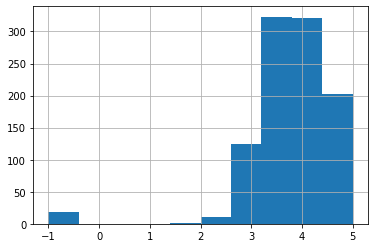

In [30]:
df.Rating.hist()

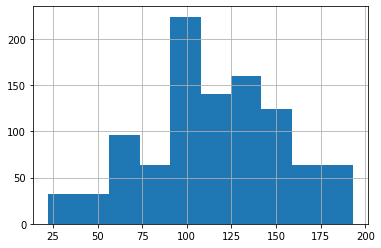

In [31]:
df.avg_salary.hist()

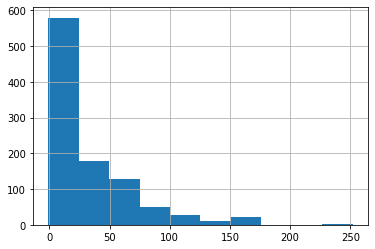

In [32]:
df.age.hist()

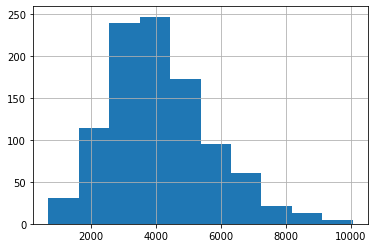

In [33]:
df.desc_len.hist() #graficamos la columna de acuerdo al numero de caracteres de la columna descripcciòn

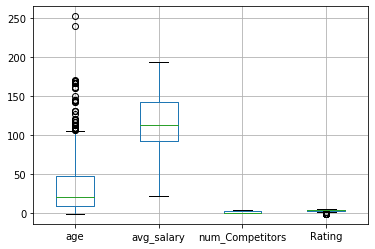

In [34]:
df.boxplot(column = ['age','avg_salary','num_Competitors','Rating']) #graficamos las columnas

In [35]:
df[['age','avg_salary','num_Competitors','Rating','desc_len']].corr()

,age,avg_salary,num_Competitors,Rating,desc_len
age,1.000000,-0.052895,0.127053,-0.040492,0.246302
avg_salary,-0.052895,1.000000,0.021516,-0.027514,-0.087318
num_Competitors,0.127053,0.021516,1.000000,-0.010381,0.148858
Rating,-0.040492,-0.027514,-0.010381,1.000000,-0.002033
desc_len,0.246302,-0.087318,0.148858,-0.002033,1.000000


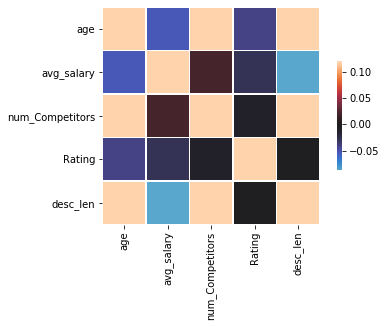

In [36]:
sns.heatmap(df[['age','avg_salary','num_Competitors','Rating','desc_len']].corr(), vmax=.12, center =0, square=True, linewidths=.6, cbar_kws={"shrink": .5})

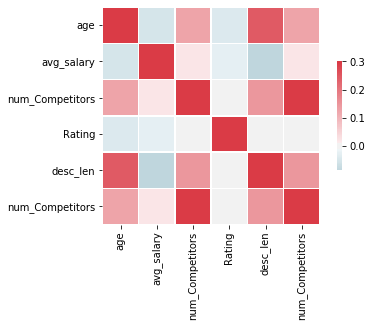

In [37]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df[['age','avg_salary','num_Competitors','Rating','desc_len','num_Competitors']].corr(), vmax=.3, center =0, cmap = cmap, square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [38]:
df_cat = df[['Location', 'Headquarters', 'Size','Type of ownership', 'Industry', 'Sector', 'Revenue','company_txt', 'some_state','python_yn', 'R_yn', 'Spark',
       'job_simp', 'seniority']]

graph for Location total = 207


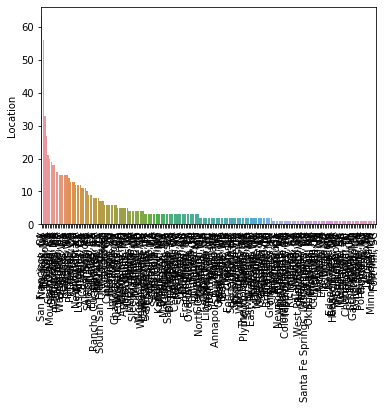

graph for Headquarters total = 215


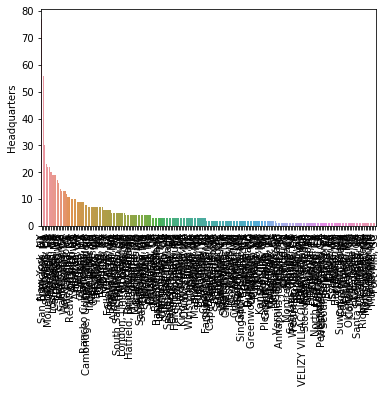

graph for Size total = 8


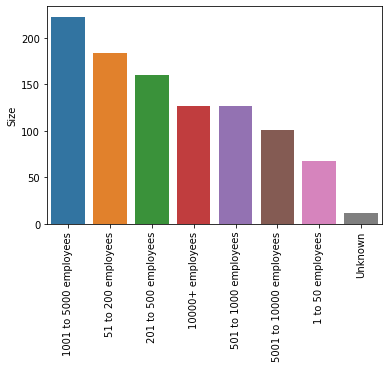

graph for Type of ownership total = 11


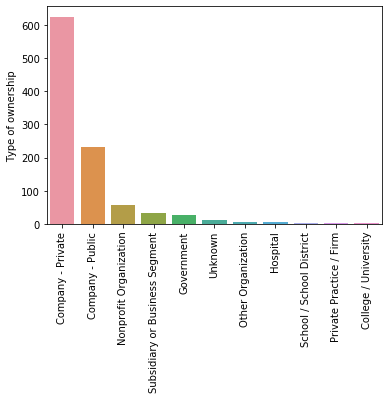

graph for Industry total = 64


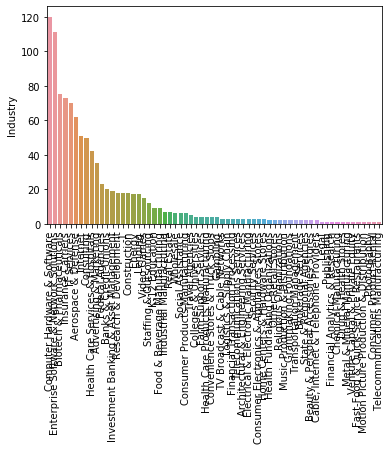

graph for Sector total = 25


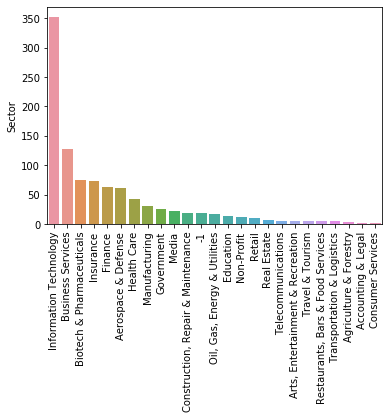

graph for Revenue total = 13


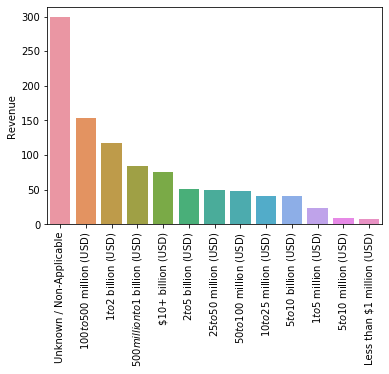

graph for company_txt total = 415


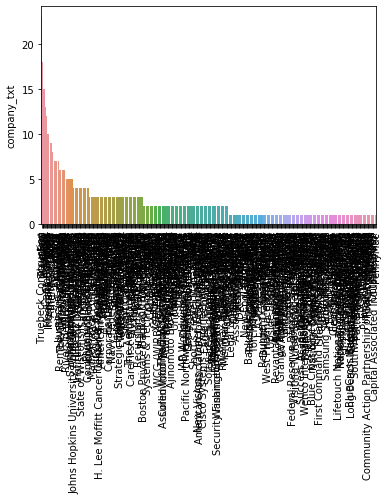

graph for some_state total = 2


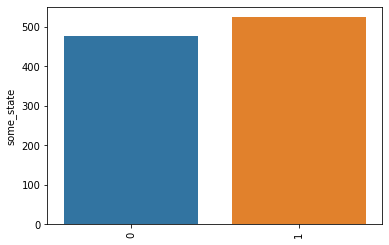

graph for python_yn total = 2


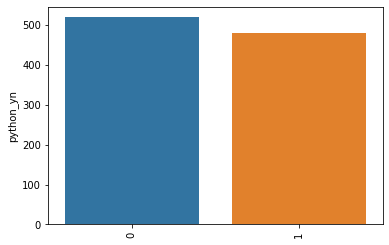

graph for R_yn total = 2


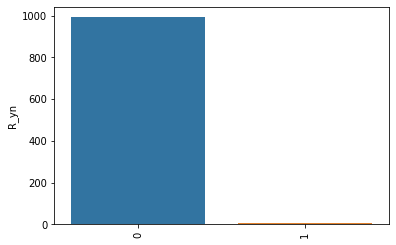

graph for Spark total = 2


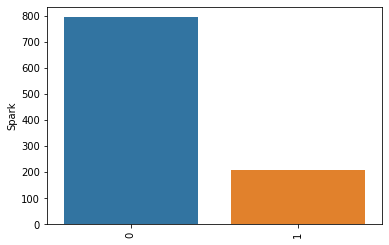

graph for job_simp total = 7


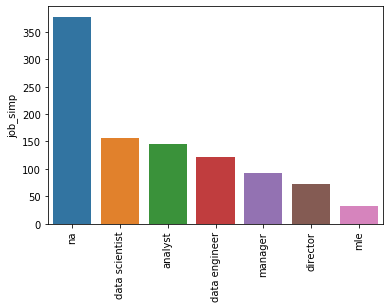

graph for seniority total = 3


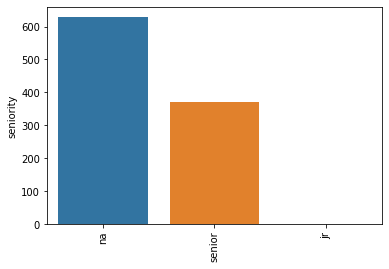

In [39]:
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    print("graph for %s total = %d" % (i, len(cat_num)))
    chart= sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

graph for Location total = 17


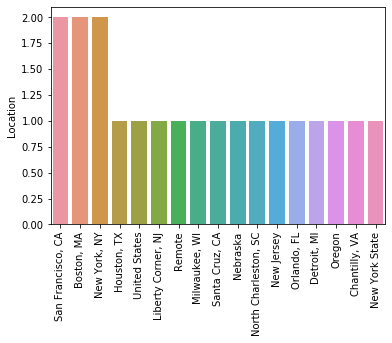

graph for Headquarters total = 16


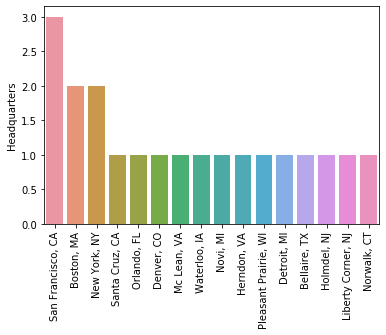

graph for company_txt total = 19


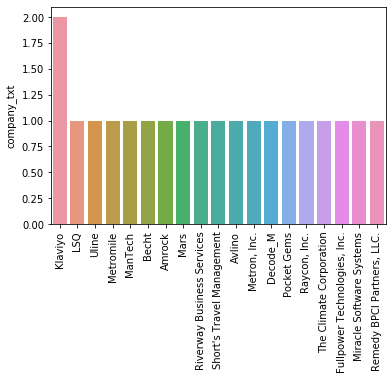

In [40]:
for i in df_cat[['Location', 'Headquarters', 'company_txt']].columns:
    # cat_num = df_cat[i][:20].value_counts() maximo 20 Columna
    cat_num = df_cat[i][:20].value_counts()[:20] #trae las 20 primeras columnas
    print("graph for %s total = %d" % (i, len(cat_num)))
    chart= sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

In [41]:
pd.pivot_table(df,index ='job_simp', values='avg_salary')

,avg_salary
job_simp,
analyst,111.034247
data engineer,113.797521
data scientist,116.968153
director,104.342466
manager,113.709677
mle,124.484375
na,117.164021


In [42]:
pd.pivot_table(df,index =['job_simp','seniority'], values='avg_salary')

avg_salary
job_simp       seniority            
analyst        jr         133.000000
               na         107.401163
               senior     115.957627
data engineer  na         113.000000
               senior     114.754545
data scientist na         111.969388
               senior     125.271186
director       na         104.017857
               senior     105.411765
manager        na         114.024590
               senior     113.109375
mle            na         123.941176
               senior     125.100000
na             na         113.924490
               senior     123.131579

In [43]:
pd.pivot_table(df,index ='job_state', values='avg_salary')

,avg_salary
job_state,
AL,114.400000
AZ,134.300000
CA,115.872263
CO,112.500000
CT,104.468750
DC,116.566667
DE,126.500000
FL,94.095238
GA,120.352941


In [44]:
pd.options.display.max_rows
pd.set_option('display.max_rows', None)

In [45]:
pd.pivot_table(df,index =['job_state', 'job_simp', 'company_txt'], values='avg_salary', aggfunc = 'count').sort_values('job_state', ascending = False)

avg_salary
job_state        job_simp       company_txt                                                   
Vancouver        na             Treasure Data                                                6
United States    na             MassMutual                                                   1
                 mle            Qualcomm                                                     2
                                Analytic Partners                                            1
                 analyst        Short's Travel Management                                    2
                                Catasys                                                      1
Toronto          na             Q2 Solutions                                                 1
                                Interaxon                                                    3
                                G-Research                                                   1
                 data scientist Rubikloud Technologies                                       1
Texas            director       Secureworks                                                  1
Santa Fe Springs data scientist Accuride International                                       1
Richmond         na             Wenco International Mining Systems                           1
Remote           na             Very                                                         1
                                The Climate Corporation                                      2
                                Kenna Security                                               1
                                Cape Analytics                                               2
                                Ars Quanta                                                   1
                 manager        WCG (WIRB-Copernicus Group)                                  2
                 data scientist Triplebyte                                                   1
                 data engineer  SocialChorus                                                 1
Oregon           na             NVIDIA                                                       1
                                Mars                                                         3
                 data scientist Mars                                                         2
New York State   manager        Medidata Solutions                                           1
                 analyst        Medidata Solutions                                           1
                                Remedy BPCI Partners, LLC.                                   2
                 data engineer  Medidata Solutions                                           2
                 na             Remedy BPCI Partners, LLC.                                   4
                                Medidata Solutions                                           2
New Jersey       na             Avlino                                                       1
                 data scientist Avlino                                                       2
Nebraska         data scientist Miracle Software Systems                                     2
Montreal         manager        Octave Group                                                 1
                 director       uni3T                                                        1
Mississauga      na             IQVIA                                                        1
Maryland         na             NVIDIA                                                       2
California       na             NVIDIA                                                       2
Calgary          analyst        PBS Systems                                                  1
 WI              analyst        Uline                                                        2
                                Associated Banc-Corp                                         1

In [46]:
pd.pivot_table(df [df.job_simp == 'data scientist'], index = 'job_state', values= 'avg_salary').sort_values('avg_salary', ascending = False)

,avg_salary
job_state,
WI,142.500000
Oregon,142.000000
New Jersey,142.000000
Nebraska,142.000000
MI,142.000000
PA,139.750000
MN,136.000000
IL,132.750000
DE,126.500000


In [47]:
# rating, industry, sector, revenue, number of comp, hourly, employer provided, r, spark, excel, desc_len, type of onwership
df_pivots = df[['Rating', 'Industry', 'Sector', 'Revenue', 'num_Competitors', 'hourly', 'employer_Provided', 'R_yn', 'Spark', 'Type of ownership', 'avg_salary']]

In [48]:
for i in df_pivots.columns:
    print(i)
    print(pd.pivot_table(df_pivots,index =i, values = 'avg_salary').sort_values('avg_salary', ascending = False))

Rating
        avg_salary
Rating            
 2.4    161.000000
 2.7    132.166667
 2.5    131.000000
 4.9    127.277778
 4.6    127.227273
-1.0    127.222222
 3.0    124.365385
 4.3    121.717391
 3.4    118.442857
 3.7    116.842857
 3.5    116.548077
 4.1    116.513158
 5.0    116.387097
 2.9    115.632353
 3.6    115.010989
 3.9    114.983333
 4.4    113.569444
 1.5    113.500000
 3.8    113.484848
 3.3    113.055556
 4.2    112.796875
 4.7    110.333333
 4.0    107.765306
 2.8    107.058824
 2.6    107.000000
 4.8    106.083333
 3.2    105.628205
 4.5    105.525641
 2.2    101.833333
 3.1    100.823529
 2.3     95.500000
Industry
                                          avg_salary
Industry                                            
Metal & Mineral Manufacturing             161.000000
Cable, Internet & Telephone Providers     157.000000
Chemical Manufacturing                    154.000000
Health Fundraising Organizations          147.000000
Financial Transaction Processing       

ValueError: Grouper for 'avg_salary' not 1-dimensional

In [49]:
pd.pivot_table(df_pivots, index ='Revenue', columns = 'Spark', values = 'avg_salary', aggfunc = "count")

Spark,0,1
Revenue,,
$1 to $2 billion (USD),95.0,23.0
$1 to $5 million (USD),16.0,7.0
$10 to $25 million (USD),36.0,5.0
$10+ billion (USD),60.0,15.0
$100 to $500 million (USD),107.0,46.0
$2 to $5 billion (USD),41.0,10.0
$25 to $50 million (USD),38.0,11.0
$5 to $10 billion (USD),30.0,11.0
$5 to $10 million (USD),9.0,NaN


In [50]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_Provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'some_state', 'age', 'python_yn', 'R_yn',
       'Spark', 'job_simp', 'seniority', 'desc_len', 'num_Competitors'],
      dtype='object')

In [58]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Developed\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Developed\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

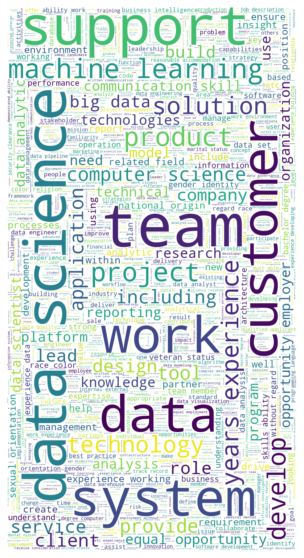

AttributeError: 'WordCloud' object has no attribute 'tofile'

In [61]:
words = " ".join(df['Job Description'])

def punctuation_stop(text):
    """Remove puntuantion and stops words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered

words_filtered = punctuation_stop(words)
text = " ".join([ele for ele in words_filtered])

wc= WordCloud(background_color="white", random_state=1, stopwords=STOPWORDS, max_words = 2000, width = 800, height = 1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

wc.tofile()

#wc.tofile()